### In this notebook:
I train xgboost model with optimized hyperparameters (see notebook `xgb_random_search`) on whole feature matrix data. Feature matrix has selected variables after feature selection. See notebook `feature_selection`.

### About project:
Data is from Kaggle competiotion [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk). 

I implement an automated feature engineering approach with an open-source library [Featuretools](https://www.featuretools.com/). 


In [1]:
import xgboost as xgb 

import numpy as np
import pandas as pd
import time
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import gc

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Import data

In [4]:
dtrain1 = pd.read_csv('../data/feature_matrix1_selected.csv')
dtrain2 = pd.read_csv('../data/feature_matrix2_selected.csv')
dtrain3 = pd.read_csv('../data/feature_matrix3_selected.csv')

In [5]:
feature_matrix4_selected = pd.read_csv('../data/feature_matrix4_selected.csv')

dtrain4 = feature_matrix4_selected.loc[~feature_matrix4_selected['TARGET'].isnull()]

In [8]:
dtest = feature_matrix4_selected.loc[feature_matrix4_selected['TARGET'].isnull()]
dtest.drop('TARGET', axis=1, inplace=True)

In [9]:
dtrain = pd.concat([dtrain1, dtrain2, dtrain3, dtrain4], axis=0)

In [10]:
dtrain.shape

(307511, 1038)

In [11]:
dtest.shape

(48744, 1037)

In [12]:
id_col = 'SK_ID_CURR'
target_col = 'TARGET'

predictors = [x for x in dtrain.columns if x not in [id_col, target_col]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dtrain[predictors], dtrain[target_col], test_size=0.2, random_state=42)

In [14]:
#Import xgb params

In [15]:
with open('../data/best_params.pkl', mode='rb') as f:
    best_params = pickle.load(f)

In [16]:
best_params

{'subsample': 0.89,
 'reg_lambda': 0.12244897959183673,
 'reg_alpha': 0.1020408163265306,
 'n_estimators': 700,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.027271356526649162,
 'gamma': 0.32,
 'colsample_bytree': 0.72,
 'colsample_bylevel': 0.6799999999999999}

In [36]:

best_params['reg_lambda'] = 0.12
best_params['reg_alpha'] = 0.1
best_params['n_estimators'] = 160
best_params['learning_rate'] = 0.10
best_params['gamma'] = 0
best_params['colsample_bytree'] = 0.8
best_params['colsample_bylevel'] = 0.8

#### Model

In [37]:
clf = xgb.XGBClassifier(silent=False, **best_params, n_jobs=-1)

In [38]:
clf.fit(X = X_train, y = y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        verbose=True)

[0]	validation_0-auc:0.713507	validation_1-auc:0.705402
[1]	validation_0-auc:0.721888	validation_1-auc:0.711756
[2]	validation_0-auc:0.725481	validation_1-auc:0.715528
[3]	validation_0-auc:0.728856	validation_1-auc:0.716923
[4]	validation_0-auc:0.7323	validation_1-auc:0.719399
[5]	validation_0-auc:0.735383	validation_1-auc:0.722234
[6]	validation_0-auc:0.740314	validation_1-auc:0.726399
[7]	validation_0-auc:0.741485	validation_1-auc:0.72712
[8]	validation_0-auc:0.743888	validation_1-auc:0.730069
[9]	validation_0-auc:0.744918	validation_1-auc:0.731319
[10]	validation_0-auc:0.745805	validation_1-auc:0.731618
[11]	validation_0-auc:0.748759	validation_1-auc:0.733308
[12]	validation_0-auc:0.751476	validation_1-auc:0.735354
[13]	validation_0-auc:0.753178	validation_1-auc:0.736974
[14]	validation_0-auc:0.756163	validation_1-auc:0.739729
[15]	validation_0-auc:0.760189	validation_1-auc:0.743106
[16]	validation_0-auc:0.76183	validation_1-auc:0.743874
[17]	validation_0-auc:0.763018	validation_1-a

[144]	validation_0-auc:0.844267	validation_1-auc:0.775401
[145]	validation_0-auc:0.844404	validation_1-auc:0.775422
[146]	validation_0-auc:0.844831	validation_1-auc:0.77555
[147]	validation_0-auc:0.845466	validation_1-auc:0.775507
[148]	validation_0-auc:0.845806	validation_1-auc:0.775582
[149]	validation_0-auc:0.845984	validation_1-auc:0.77555
[150]	validation_0-auc:0.846335	validation_1-auc:0.775581
[151]	validation_0-auc:0.846676	validation_1-auc:0.775494
[152]	validation_0-auc:0.846795	validation_1-auc:0.775503
[153]	validation_0-auc:0.847019	validation_1-auc:0.775493
[154]	validation_0-auc:0.847205	validation_1-auc:0.775464
[155]	validation_0-auc:0.847417	validation_1-auc:0.775449
[156]	validation_0-auc:0.847668	validation_1-auc:0.775578
[157]	validation_0-auc:0.847915	validation_1-auc:0.775722
[158]	validation_0-auc:0.848244	validation_1-auc:0.775699
[159]	validation_0-auc:0.848665	validation_1-auc:0.775815


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=160,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0.1, reg_lambda=0.12, scale_pos_weight=1,
       seed=None, silent=False, subsample=0.89)

In [39]:
#Save trained model
pickle.dump(clf, open('../data/results/clf_opt_2.dat', 'wb'))

#### Evaluation

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
results = clf.evals_result()

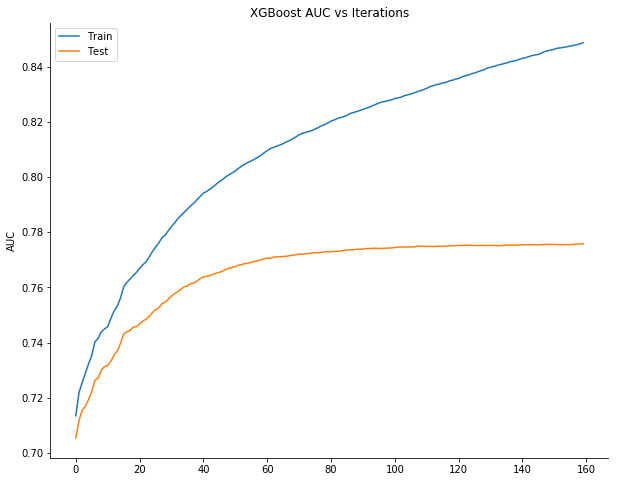

In [42]:
# retrieve performance metrics
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('AUC')
plt.title('XGBoost AUC vs Iterations')
plt.show()


In [43]:
#Train evaluation
train_pred = clf.predict_proba(dtrain[predictors])

In [44]:
dtrain[target_col].values

array([1., 0., 0., ..., 0., 0., 0.])

In [45]:
train_pred[:, 0]

array([0.60220194, 0.98691994, 0.96150273, ..., 0.9903535 , 0.9450472 ,
       0.79215044], dtype=float32)

In [46]:
roc_auc_score(dtrain[target_col], train_pred[:, 1])

0.8339751649688727

In [47]:
predictions = clf.predict_proba(dtest[predictors])

In [48]:
predictions

array([[0.9635415 , 0.03645847],
       [0.8552246 , 0.14477539],
       [0.965874  , 0.03412597],
       ...,
       [0.9451598 , 0.05484019],
       [0.9522056 , 0.04779438],
       [0.44665676, 0.55334324]], dtype=float32)

In [49]:
pickle.dump(predictions, open('../data/results/predictions.pkl', 'wb'))